# <font color='red'>problem statement</font>
a company try to predict how much salary they offer to a new employee based on experience ,test score , interview score etc
## using multiple linear regression we are try to build a model which is predicting the salary

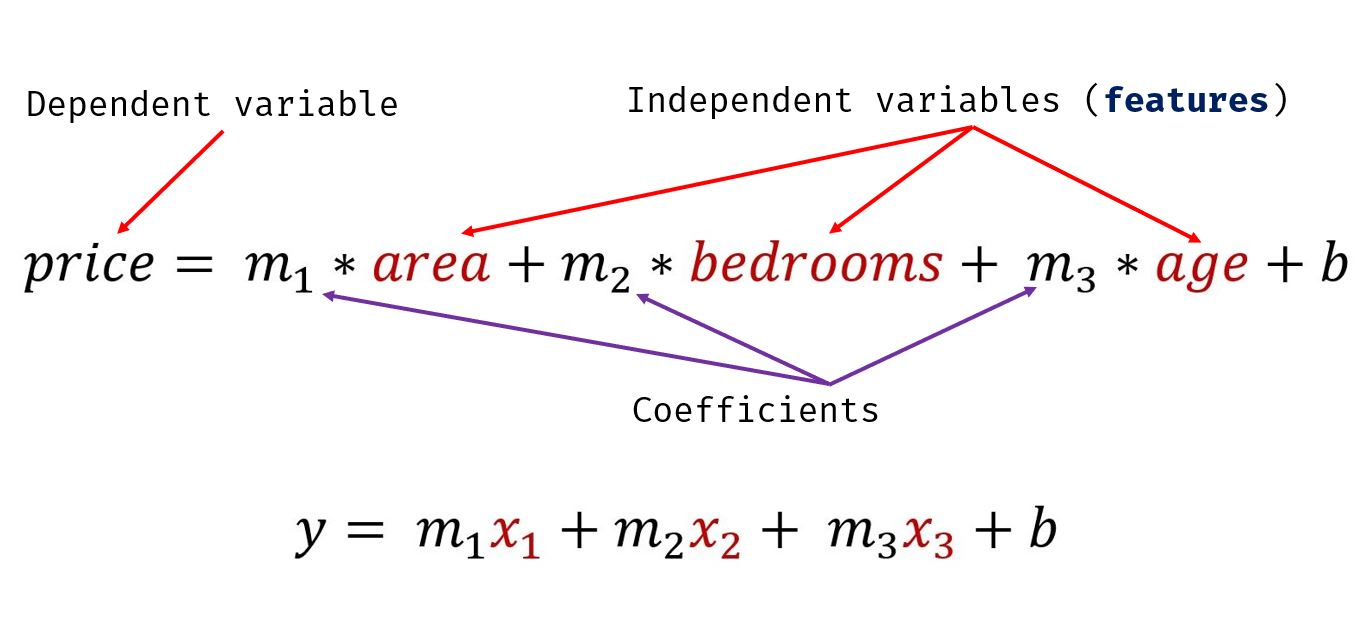

In [1]:
#loading the enviroment
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('/home/md/Data_Analysis/machine_learning/multiple_linear_regression/hiring.csv')

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
#checking null values
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

## data preprocessing
handelinng the missing NaN value


In [5]:
#putting median value as nan in test_score
df['test_score(out of 10)'] =df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

In [6]:
#installing word2number module for convert text to numeric value
#pip install word2number

In [7]:
from word2number import w2n

In [8]:
#assigning zero in nan value in experience value
df.experience=df.experience.fillna('zero')

In [9]:
#import math function
df.experience=df.experience.apply(w2n.word_to_num)

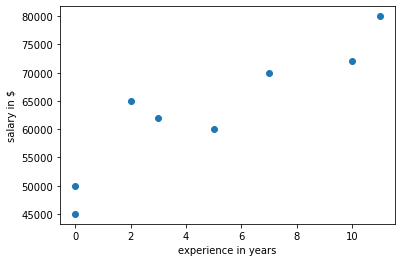

In [10]:
#creating scatter plot to see the relationship with dependent variable
plt.xlabel('experience in years')
plt.ylabel('salary in $')
plt.scatter(x=df['experience'],y=df['salary($)'])
plt.show()

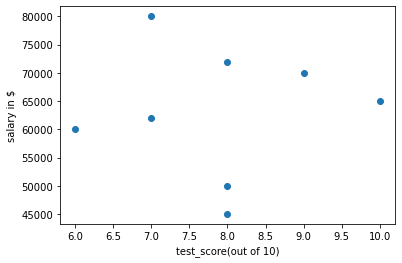

In [11]:
#creating scatter plot to see the relationship with dependent variable
plt.xlabel('test_score(out of 10)')
plt.ylabel('salary in $')
plt.scatter(x=df['test_score(out of 10)'],y=df['salary($)'])
plt.show()

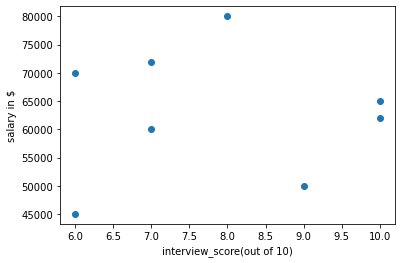

In [12]:
#creating scatter plot to see the relationship with dependent variable
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary in $')
plt.scatter(x=df['interview_score(out of 10)'],y=df['salary($)'])
plt.show()

## Data Modelling

In [13]:
#importinbg the sk learn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
#dividing the feature and target variable
x=df.drop(['salary($)'],axis=1)
y=df['salary($)']

In [15]:
#dividing data into training set and traing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
reg=LinearRegression()

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
#checking the accuracy on trainning dataset
reg.score(x_train,y_train)

0.9874429014327384

In [25]:
#checking the accuracy on testing dataset
reg.score(x_test,y_test)

0.8760248990900698

In [19]:
x_pred=reg.predict(x_test)

In [20]:
y_test.head()

6    72000
2    60000
1    45000
Name: salary($), dtype: int64

In [21]:
x_pred

array([78187.25761773, 57354.0166205 , 44697.50692521])

### predicting  salary for a employee who got 3 years of experience who got 8 in test round and 9 in interview round

In [23]:
reg.predict([[3,8,9]])

array([60771.19113573])

# <font color='red'>ans : 60771$</font>